In [14]:
import os
for dir in os.listdir(".\data"):
    print(dir)

mitbih_test.csv
mitbih_train.csv


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
train_df = pd.read_csv(os.path.join(".\data\\train","mitbih_train.csv"), header=None)
test_df = pd.read_csv(os.path.join(".\data\\test","mitbih_test.csv"), header=None)

In [31]:
print(train_df[187])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: 187, Length: 87554, dtype: float64


In [32]:
train_df[187].astype(int).value_counts()

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

In [36]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [38]:
train_df[187].astype(int).value_counts()

0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64

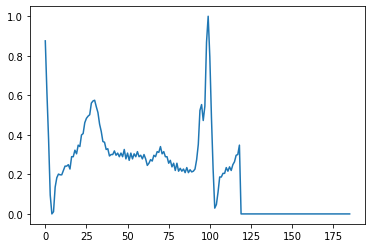

In [40]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))
plt.plot(c.iloc[0,:186])

In [42]:
# def add_gaussian_noise(signal):
#     noise=np.random.normal(0,0.5,186)
#     return (signal+noise)

In [44]:
from keras.utils import to_categorical

target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [45]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
# for i in range(len(X_train)):
#     X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [47]:
print(X_train.shape)
print(y_train.shape)

(100000, 186, 1)
(100000, 5)


In [73]:
from keras.layers import Convolution1D, MaxPooling1D, Flatten, Dense, Input
from keras import Sequential

def network(X_train,y_train,X_test,y_test):   
    model = Sequential((
        Convolution1D(64, 6, activation='relu', input_shape=(186,1)),
        MaxPooling1D(),
        Convolution1D(64, 3, activation='relu'),
        MaxPooling1D(),
        Flatten(),
        Dense(5, activation='softmax'),
    ))
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    history=model.fit(X_train, y_train,epochs=5,batch_size=32,validation_data=(X_test,y_test))
    return(model,history)

In [74]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']

In [75]:
model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/5
3125/3125 [==============================] - 36s 11ms/step - loss: 0.4264 - accuracy: 0.8460 - val_loss: 0.5467 - val_accuracy: 0.7814
Epoch 2/5
3125/3125 [==============================] - 38s 12ms/step - loss: 0.2380 - accuracy: 0.9155 - val_loss: 0.3818 - val_accuracy: 0.8670
Epoch 3/5
3125/3125 [==============================] - 36s 12ms/step - loss: 0.1811 - accuracy: 0.9368 - val_loss: 0.2214 - val_accuracy: 0.9321
Epoch 4/5
3125/3125 [==============================] - 38s 12ms/step - loss: 0.1495 - accuracy: 0.9483 - val_loss: 0.2258 - val_accuracy: 0.9271
Epoch 5/5
3125/3125 [==============================] - 37s 12ms/step - loss: 0.1274 - accuracy: 0.9571 - val_loss: 0.2044 - val_accuracy: 0.9363


Accuracy: 93.63%


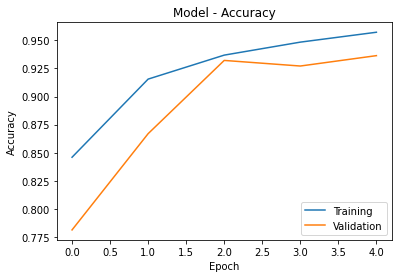

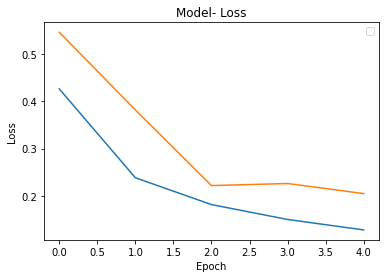

685/685 [==============================] - 3s 4ms/step


In [77]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

In [92]:

from sklearn.metrics import f1_score

y_pred_ = np.argmax(y_pred, axis=1)
y_test_ = np.argmax(y_test, axis=1)

count = 0
total = 0
for i in range(len(y_test_)):
    total += 1
    if y_test_[i]==y_pred_[i]:
        count += 1

print(count, total)

20498 21892
